# Import Libraries

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist


# Loading the Dataset

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [12]:
#shape of dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Plotting The Dataset

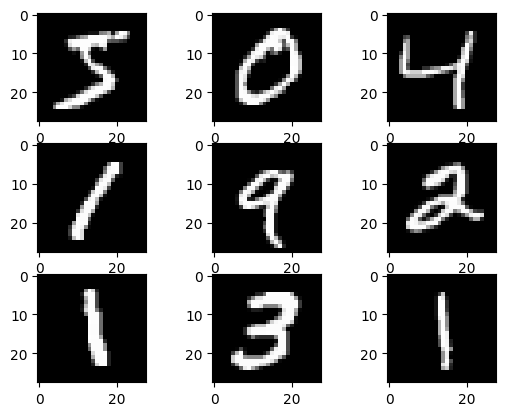

In [13]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Normalising Data

In [14]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Creating a feed forward Neural Network

In [15]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten (input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [16]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2634 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1088 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0544 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0405 - accuracy: 0.9867


# Evaluating model on the test data

In [17]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9744



# Testing model on our handwritten digits

1/1 [==============================] - 0s 72ms/step
This number is: 8


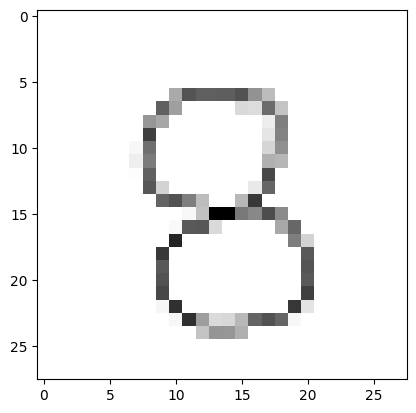

1/1 [==============================] - 0s 20ms/step
This number is: 2


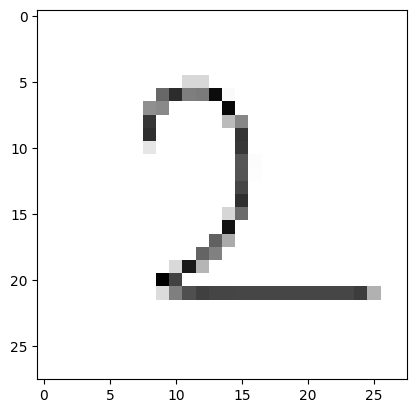

1/1 [==============================] - 0s 20ms/step
This number is: 3


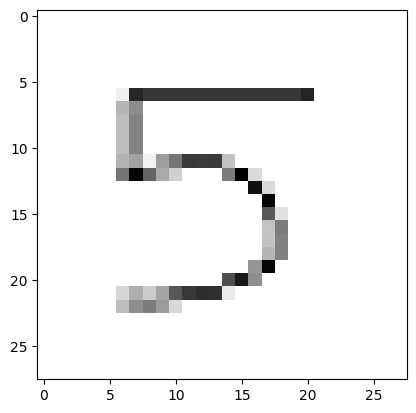

1/1 [==============================] - 0s 24ms/step
This number is: 7


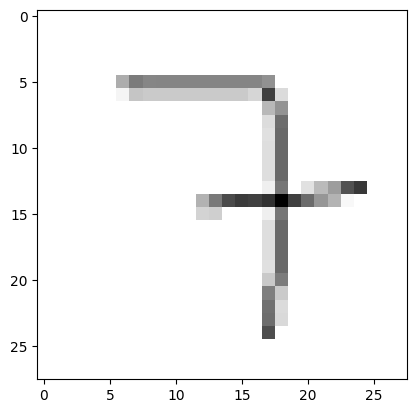

1/1 [==============================] - 0s 23ms/step
This number is: 3


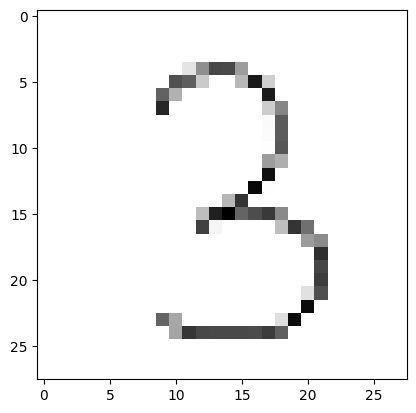

In [18]:
for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This number is: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()